In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [26]:
perf_dir = os.path.abspath('../predictions_varlength_ts/')

In [35]:
dirnames_filenames_dict = {'pchmm':'PCHMM', 
                           'GRU-D' : 'GRUD'}

perf_df_list = []
for dirname, fname in dirnames_filenames_dict.items():
    perf_csv = os.path.join(perf_dir, dirname, '%s_performance_toy_data.csv'%fname)
    perf_df = pd.read_csv(perf_csv)
    perf_df_list.append(perf_df)
perf_df_final = pd.concat(perf_df_list)

searchfor = ['PCHMM']
s=perf_df_final['model'].copy()
pchmm_inds = [s.str.contains('|'.join(searchfor))][0]
gru_inds = ~(pchmm_inds)
perf_df_final.loc[pchmm_inds, 'model'] = perf_df_final.loc[pchmm_inds, 'model']+ ' (parameters=40)'
perf_df_final.loc[gru_inds, 'model'] = perf_df_final.loc[gru_inds, 'model']+ ' (parameters=3925)'
perf_df_final
# pchmm_inds = perf_df_final['model'].contains('PCHMM')

,train_AUC,valid_AUC,test_AUC,model,perc_obs
0,0.796104,0.539526,0.651515,PCHMM no imputation (ours) (parameters=40),20
1,0.817976,0.832016,0.739394,PCHMM no imputation (ours) (parameters=40),40
2,0.939519,0.940711,0.881818,PCHMM no imputation (ours) (parameters=40),60
3,0.984428,0.990119,0.977273,PCHMM no imputation (ours) (parameters=40),80
4,1.000000,0.998024,1.000000,PCHMM no imputation (ours) (parameters=40),100
5,0.577604,0.431818,0.566667,PCHMM forward fill imputation (parameters=40),20
6,0.686708,0.623518,0.481061,PCHMM forward fill imputation (parameters=40),40
7,0.763020,0.772727,0.718182,PCHMM forward fill imputation (parameters=40),60
8,0.862691,0.798419,0.816667,PCHMM forward fill imputation (parameters=40),80
9,1.000000,0.998024,1.000000,PCHMM forward fill imputation (parameters=40),100


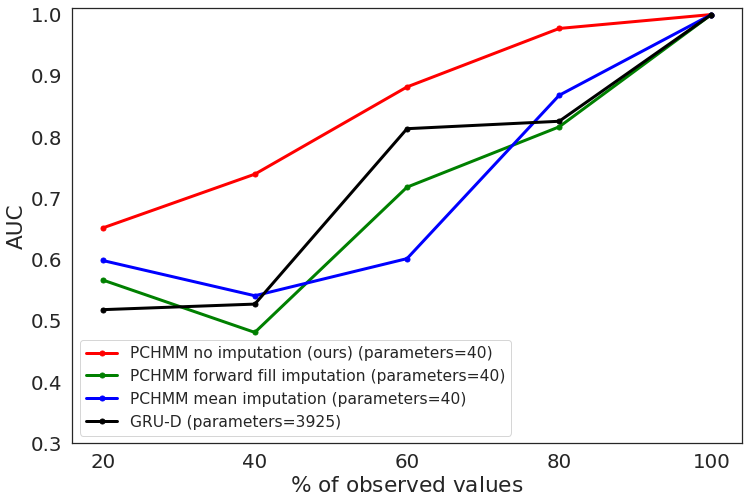

In [36]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.set_style("white") # or use "white" if we don't want grid lines
sns.set_context("notebook", font_scale=1.8)
# sns.set(font_scale=1.4)

x=perf_df_final['perc_obs'].unique()
models = perf_df_final['model'].unique()
model_colors = ['r', 'g', 'b', 'k']

for ii, model in enumerate(models):
    curr_inds = perf_df_final['model']==model
    curr_model_auc_over_perc_obs = perf_df_final.loc[curr_inds, 'test_AUC'].values
    ax.plot(x, curr_model_auc_over_perc_obs, marker='.', color=model_colors[ii], label=model, lw=3, markersize=10)
#     sns.pointplot(data=perf_df_final, x='perc_obs', y='train_AUC', hue='model', ax=ax, marker='.')
ax.set_ylabel('AUC')
ax.set_xlabel(r'$\%$ of observed values')
ax.legend(fontsize=15.5)
ax.set_ylim([0.3, 1.01])
ax.set_xticks([20, 40, 60, 80, 100])
f.savefig('toy_data_performance_pchmm_vs_grud_missing_data.png',bbox_inches='tight', pad_inches=0)
f.savefig('toy_data_performance_pchmm_vs_grud_missing_data.pdf',bbox_inches='tight', pad_inches=0)
plt.show()

In [31]:
train_test_dir = "/cluster/tufts/hugheslab/prath01/projects/time_series_prediction/datasets/toy_overheat/v20200515/train_test_split_dir"

y_train_df = pd.read_csv(os.path.join(train_test_dir, "y_train_no_imp_observed=80_perc.csv"))
y_valid_df = pd.read_csv(os.path.join(train_test_dir, "y_valid_no_imp_observed=80_perc.csv"))
y_test_df = pd.read_csv(os.path.join(train_test_dir, "y_test_no_imp_observed=80_perc.csv"))

In [34]:
y_train_df['did_overheat_binary_label'].sum()/len(y_train_df)

0.42063492063492064

In [33]:
y_valid_df['did_overheat_binary_label'].sum()/len(y_valid_df)

0.5111111111111111

In [32]:
y_test_df['did_overheat_binary_label'].sum()/len(y_test_df)

0.37735849056603776

In [13]:
len(y_train_df)

252

In [14]:
len(y_valid_df)

45

In [15]:
len(y_test_df)

53